In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import MiniBatchKMeans

In [ ]:
np.random.seed(0)
(images, labels), _ = cifar100.load_data()

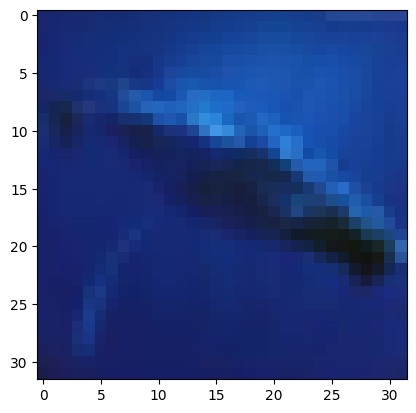

In [ ]:
images = images / 255.0 #normalizing images
ind = 4311
target = images[ind]
plt.imshow(target, vmax = 1.0)
plt.show()

In [ ]:
def plotInRow(ims):
  'Takes a list/array of images and plots them spaced horizontally.'
  _, axs = plt.subplots(1, len(ims), figsize = (20, 5))
  for im, ax in zip(ims, axs.ravel()):
    ax.imshow(im)
    ax.axis('off')

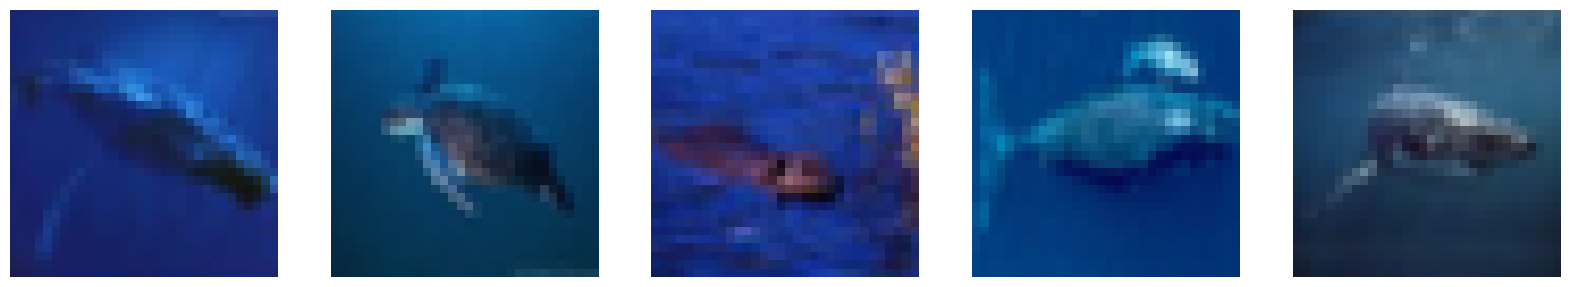

In [ ]:
u = images.shape[1]
v = images.shape[2]
w = images.shape[3]

secondDim = u * v * w #for reshaping
imagesFlat = images.reshape((images.shape[0], secondDim))
distances = np.linalg.norm(imagesFlat - imagesFlat[ind], axis = 1) #individual euclid. distances
sorted = np.argsort(distances)
nearestFive = sorted[:5] #nearest 5 from argsort
nearestImages = imagesFlat[nearestFive].reshape((5, u, v, w))

plotInRow(nearestImages) #plotting the images

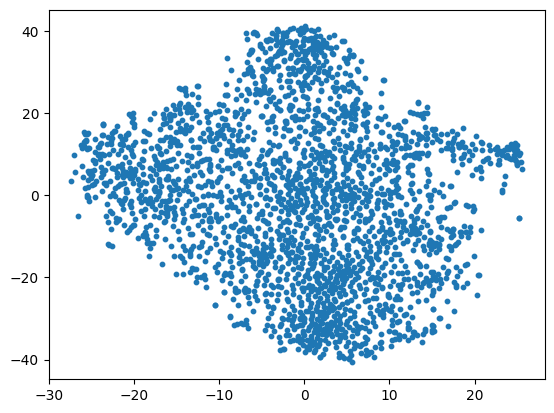

In [ ]:
reducedData = images[:2500] #reducing number of images to 2500
reducedFlat = reducedData.reshape(reducedData.shape[0], u * v * w)
tsne = TSNE(n_components = 2, init = 'random', learning_rate = 'auto') #parameters to get rid of warnings

#fitting the data and storing its embedding for plots
tsne.fit(reducedFlat)
tsneX = tsne.embedding_

plt.scatter(tsneX.T[0], tsneX.T[1], s = 10) #plotting reduced data
plt.show()

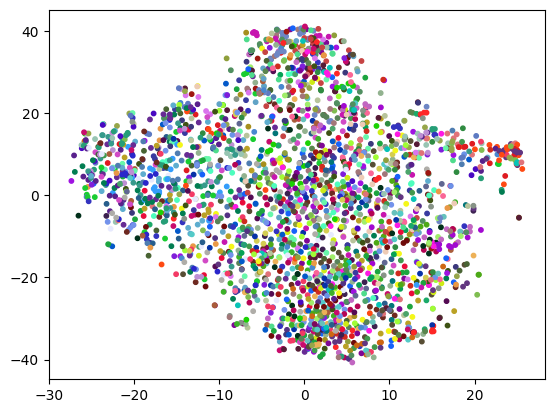

In [ ]:
reducedLabels = labels[:2500]

labelColors = np.random.random((100, 3)) #100 labels in dataset from 0-99
colors = labelColors[reducedLabels]

plt.scatter(tsneX.T[0], tsneX.T[1], c = colors, s = 10) #plotting with corresponding colors
plt.show()

In [ ]:
def plotAtPoint(im, xy, zoom = 1):
  dxy = np.random.rand(2) / 100 * plt.ylim()
  plt.arrow(*xy, *dxy)
  ab = AnnotationBbox(OffsetImage(im, zoom = zoom), xy + dxy, frameon = False)
  plt.gca().add_artist(ab)

plt.figure(figsize = (40, 40)) # larger figure may be better
plt.scatter(tsneX.T[0], tsneX.T[1]) #initial scatter plot

for im, xy in zip(images, tsneX):
  plotAtPoint(im, xy, 1.0) #plotting images on scatter points

Output hidden; open in https://colab.research.google.com to view.

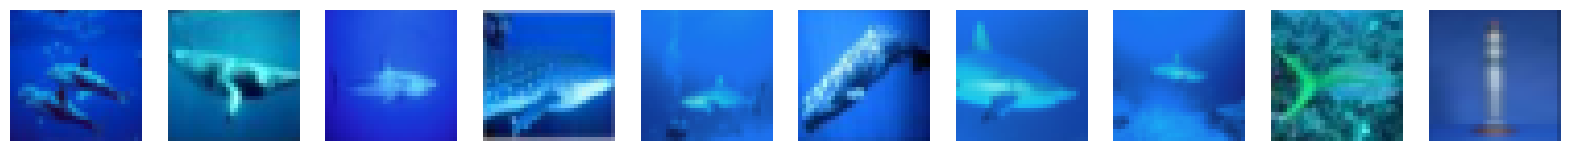

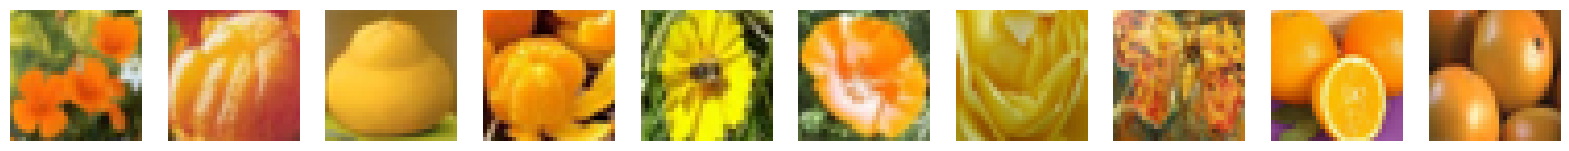

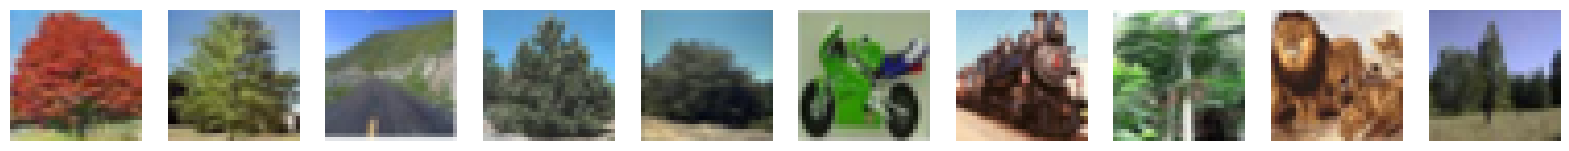

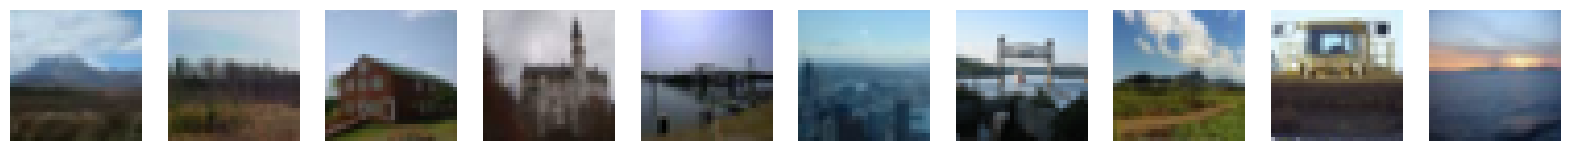

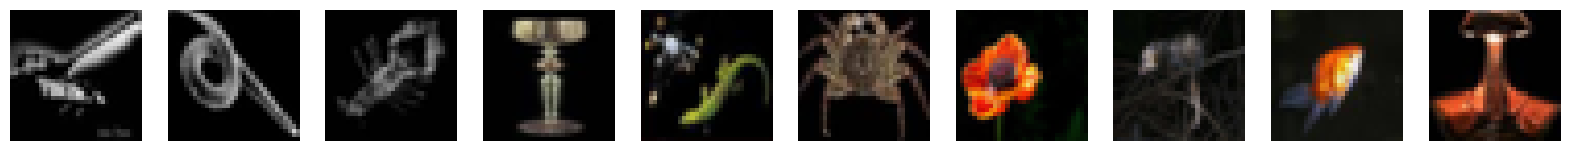

In [ ]:
def findNearestTen(x, y):
  'Finds the nearest ten images in the tsne embedding given an (x, y) coordinate pair.'
  distances = np.hypot(tsneX.T[0] - x, tsneX.T[1] - y) #element-wise euclidean distances
  nearest = np.argsort(distances)[:10]
  return nearest

def plotImages(ims):
  'Plots the nearest ten images in a row'
  _, ax = plt.subplots(1, 10, figsize = (20, 5))
  for i, j in enumerate(ims): #plotting each image using subplots
    ax[i].imshow(images[j])
    ax[i].axis('off')
  plt.show()

#pattern 1
pattern1 = findNearestTen(25, 10)
plotImages(pattern1)

#pattern 2
pattern2 = findNearestTen(20, -10)
plotImages(pattern2)

#pattern 3
pattern3 = findNearestTen(-10, 0)
plotImages(pattern3)

#pattern 4
pattern4 = findNearestTen(-25, 5)
plotImages(pattern4)

#pattern 5
pattern5 = findNearestTen(0, -38)
plotImages(pattern5)

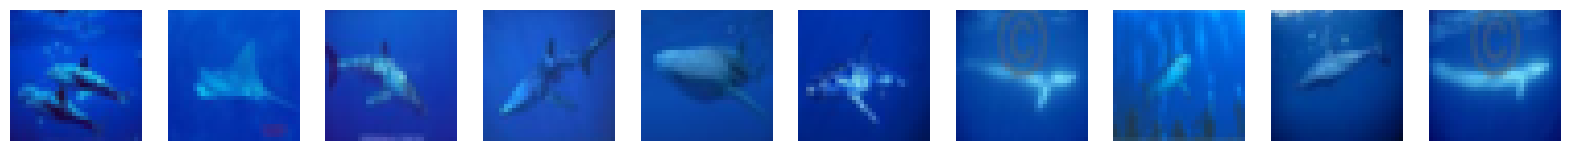

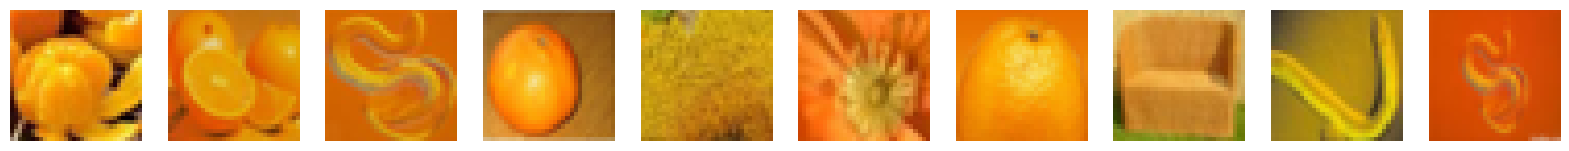

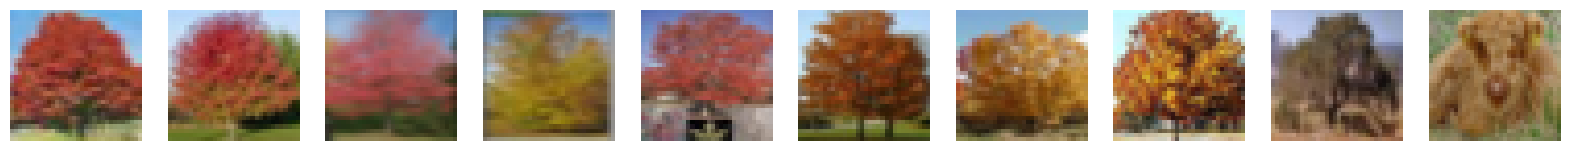

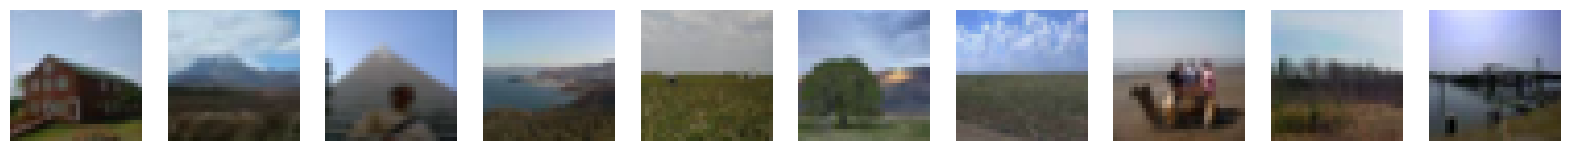

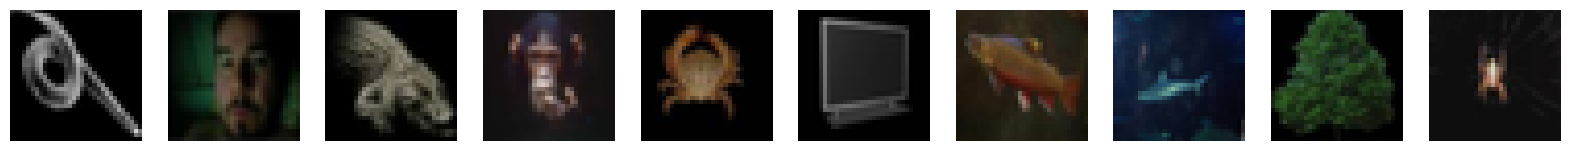

In [ ]:
repImages = [images[pattern1[0]], images[pattern2[3]], images[pattern3[0]], \
             images[pattern4[2]], images[pattern5[1]]] #picking a representative image from each pattern

repFlat = repImages[0].shape[0] * repImages[0].shape[1] * repImages[0].shape[2]

#for each image, find closest ten in original higher dimensional space
for img in repImages:
  distances = np.linalg.norm(imagesFlat - img.reshape(repFlat,), axis = 1) #using image data instead of tsne embedding
  sorted = np.argsort(distances)[:10]
  nearestImages = imagesFlat[sorted].reshape((10, u, v, w))
  plotInRow(nearestImages)
  plt.show()

Clustering with kmeans

In [ ]:
km = MiniBatchKMeans(n_clusters = 10, n_init = 'auto', max_iter = 300) #initializing and tuning parameters
secondDim = reducedData.shape[1] * reducedData.shape[2] * reducedData.shape[3]
reducedFlat = reducedData.reshape(reducedData.shape[0], secondDim) #reshaping the reduced data
km.fit(reducedFlat) #fitting the reduced data

MiniBatchKMeans(max_iter=300, n_clusters=10, n_init='auto')

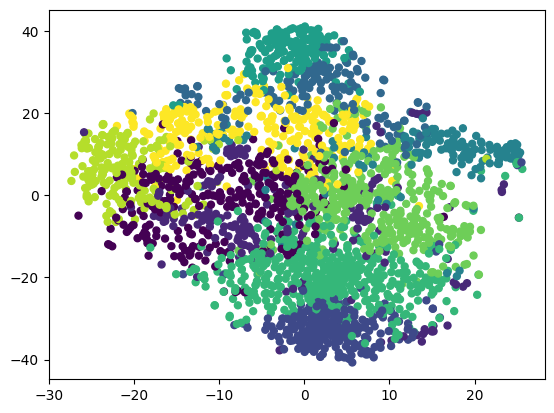

In [ ]:
colors = km.fit_predict(reducedFlat) #assigning colors using built in function
plt.scatter(tsneX.T[0], tsneX.T[1], c = colors, s = 25) #plotting the image
plt.show()

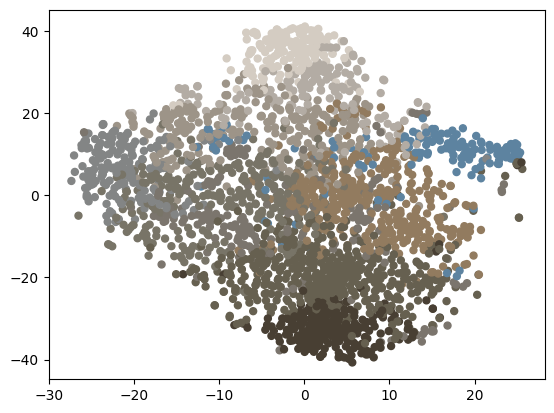

In [ ]:
meanColors = np.zeros((10, 3)) #10 clusters, 3 columns each for RGB
for i in range(km.n_clusters):
  currentCluster = reducedFlat[km.labels_ == i]
  currentCluster = currentCluster.reshape(currentCluster.shape[0], u, v, w)
  meanRGB = np.mean(currentCluster, axis = (0, 1, 2)) #produces mean of each RGB color. shape of array is (3,)
  meanColors[i] = meanRGB

#plotting with mean cluster image color
plt.scatter(tsneX.T[0], tsneX.T[1], c = meanColors[km.labels_], s = 25)
plt.show()

In [ ]:
km = MiniBatchKMeans(n_clusters = 100, n_init = 'auto', max_iter = 300) #increasing to match total number of groups
km.fit(imagesFlat)

MiniBatchKMeans(max_iter=300, n_clusters=100, n_init='auto')